# importing files

In [99]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
batch_size = 128
num_classes = 10
epochs = 12


# loading data 

In [100]:

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# inserting data to varibals

In [101]:
x_train = x_train[:5000,:]
x_test = x_test[:,:]

y_train = y_train[:5000,]
y_test = y_test[:,]

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print("========================================")
print('y_train shape:', y_train.shape)
print(y_train.shape[0], 'train samples')
print(y_test.shape[0], 'test samples')


x_train shape: (5000, 28, 28, 1)
5000 train samples
10000 test samples
y_train shape: (5000,)
5000 train samples
10000 test samples


# building the model layers

In [102]:

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


# traning our model

In [104]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 5000 samples, validate on 10000 samples
Epoch 1/12
5000/5000 [==============================] - 144s 29ms/step - loss: 0.5581 - acc: 0.8428 - val_loss: 0.2192 - val_acc: 0.9388
Epoch 2/12
5000/5000 [==============================] - 143s 29ms/step - loss: 0.3187 - acc: 0.9016 - val_loss: 0.1806 - val_acc: 0.9459
Epoch 3/12
5000/5000 [==============================] - 147s 29ms/step - loss: 0.2391 - acc: 0.9306 - val_loss: 0.3376 - val_acc: 0.9061
Epoch 4/12
5000/5000 [==============================] - 141s 28ms/step - loss: 0.2068 - acc: 0.9356 - val_loss: 0.1657 - val_acc: 0.9554
Epoch 5/12
5000/5000 [==============================] - 129s 26ms/step - loss: 0.1477 - acc: 0.9520 - val_loss: 0.1600 - val_acc: 0.9602
Epoch 6/12
5000/5000 [==============================] - 136s 27ms/step - loss: 0.1229 - acc: 0.9632 - val_loss: 0.1881 - val_acc: 0.9526
Epoch 7/12
5000/5000 [==============================] - 139s 28ms/step - loss: 0.1185 - acc: 0.9638 - val_loss: 0.1572 - val_acc:

In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

# save and load our modeling

In [106]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

In [107]:
# returns a compiled model
# identical to the previous one

model = load_model('my_model.h5')

In [108]:
#test if the model loaded or not 
model.summary()
print(x_test.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

# testing our model 

In [109]:
limit_test = 500
x_test_new = x_test[:limit_test,:]
y_test_new = y_test[:limit_test,]
x_test_new = x_test_new.reshape(limit_test,28,28,1)

score = model.evaluate(x_test_new, y_test_new, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08048654138110578
Test accuracy: 0.9799999995231629


In [110]:
print(x_test_new.shape)

(500, 28, 28, 1)


In [111]:
 model.predict(x_test_new, batch_size=32)

array([[6.70186589e-22, 2.78982363e-22, 1.15074587e-17, ...,
        1.00000000e+00, 1.01126265e-23, 9.31277455e-17],
       [9.83099380e-09, 9.75432641e-08, 9.99997377e-01, ...,
        1.26453203e-08, 1.09297349e-09, 1.15752410e-15],
       [6.58739177e-17, 1.00000000e+00, 1.44675411e-10, ...,
        1.46654026e-11, 1.39212877e-10, 1.58540326e-14],
       ...,
       [1.38233281e-05, 1.21820435e-01, 3.29035465e-05, ...,
        7.84234580e-05, 3.19142900e-02, 6.20628655e-01],
       [7.43941963e-01, 4.35640146e-08, 9.20491657e-05, ...,
        5.34808423e-05, 2.38349587e-01, 1.74735859e-02],
       [1.68373631e-11, 3.51193970e-11, 5.90162142e-14, ...,
        3.77735427e-14, 5.84069237e-10, 2.14521834e-14]], dtype=float32)

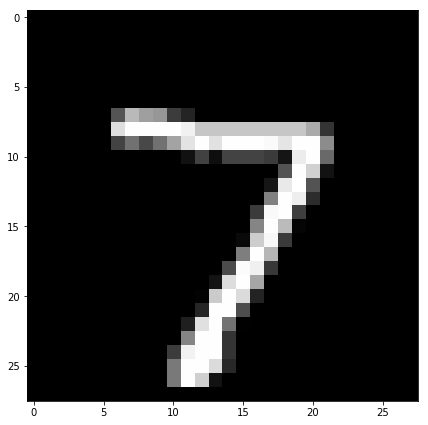

In [120]:
plt.imshow(x_test_new[0].reshape(28,28), cmap='gray', interpolation='none')

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 2 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 8 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 6 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 7 9 3 0 4 2 0 7 1 1 2 1
 5 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 9 1 1 4 0 7 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5
 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0
 8 0 6 4 3 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2 7 5 8 9 6 1 8 4 1 2 5 9 1
 9 7 5 4 0 8 9 9 1 0 5 2 

C:\Users\Alhassan\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  import sys
C:\Users\Alhassan\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


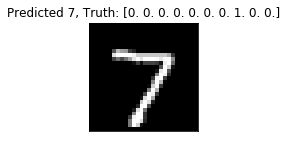

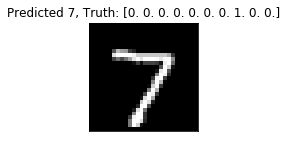

In [122]:
# load the model and create predictions on the test set
mnist_model = load_model("my_model.h5")
predicted_classes = mnist_model.predict_classes(x_test_new)
print(predicted_classes)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test_new)[0]
print("correct_indices ",correct_indices)
incorrect_indices = np.nonzero(predicted_classes != y_test_new)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:10]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test_new[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test_new[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test_new[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test_new[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation